LEVEL-2
Idea: Predicting House Prices with Linear Regression

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Housing.csv')

# Display the first few rows
print(df.head())

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Handle missing values for numeric columns only
numeric_df = df.select_dtypes(include=['number'])  # Select numeric columns
df[numeric_df.columns] = numeric_df.fillna(numeric_df.median())  # Fill missing values in numeric columns

# Ensure correct data types
print(df.dtypes)


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
price               0
area                0
bedrooms            0
bathrooms           0
stories    

Feature Selection

In [5]:
# Correlation matrix to see the relationship between features and the target variable 'price'
# Convert relevant columns to numeric type before calculating correlation
df_numeric = df.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, replace non-numeric with NaN
df_numeric = df_numeric.fillna(df_numeric.median()) # Fill NaN values with median
corr_matrix = df_numeric.corr()
print(corr_matrix['price'].sort_values(ascending=False))

# Select features based on correlation
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
            'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']
X = df[features]
y = df['price']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)


price               1.000000
area                0.535997
bathrooms           0.517545
stories             0.420712
parking             0.384394
bedrooms            0.366494
mainroad                 NaN
guestroom                NaN
basement                 NaN
hotwaterheating          NaN
airconditioning          NaN
prefarea                 NaN
furnishingstatus         NaN
Name: price, dtype: float64


model traning

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

model evaulate

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1754318687330.6638
R-squared: 0.6529242642153184


Visualization

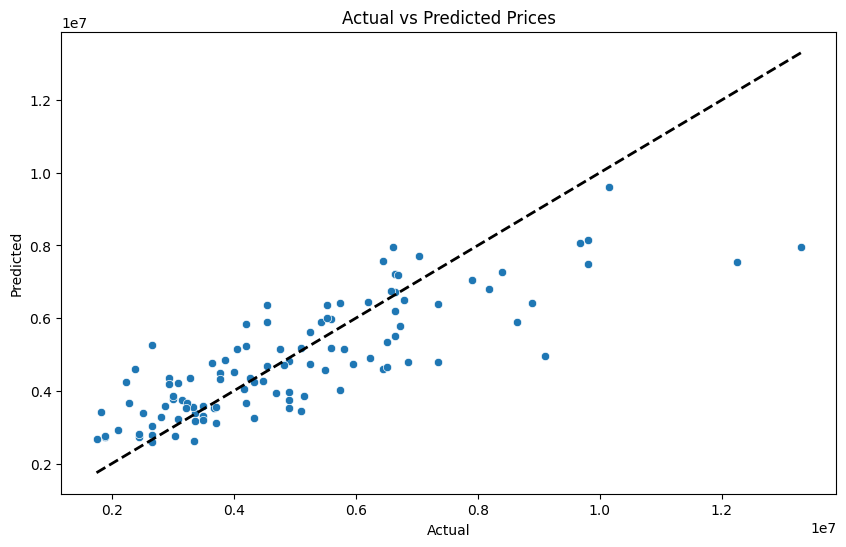

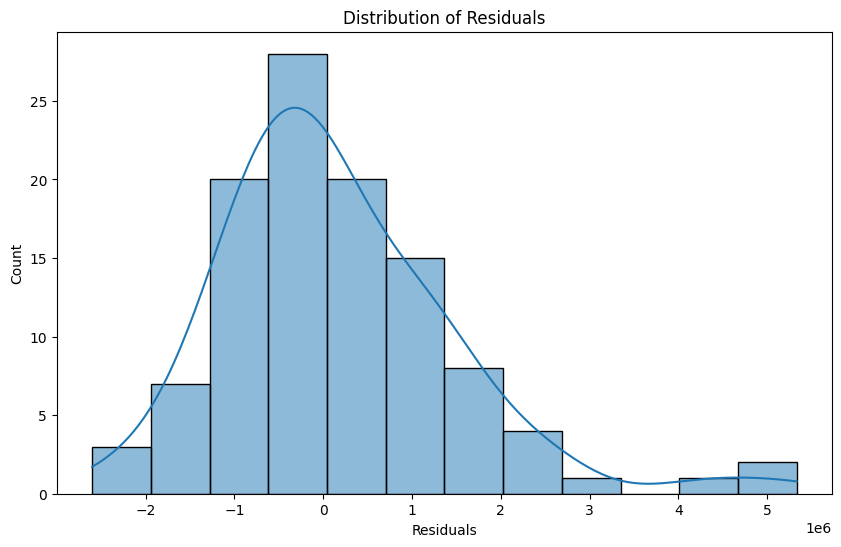

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Prices')
plt.show()

# Distribution plot of residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()
